In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'
font ={'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)

**SIMPLE model of a days developments**

NOTE: THIS IS A VERY SIMPLE MODEL AND IS MERELY FOR DEMONSTRATING THE BENEFIT OF KEEPING TRANSMISSION RATES LOW.

This is not designed to predict the spread of coronavirus, merely show a simple example of why social distancing and such measures are important.  

For a given day we begin by saying that each infected person has a chance of infecting someone new.
That calculation is the calculated as the infection rate multiplied by the number of carriers.  We also scale this by the chance of encountering someone susceptable.  These people are the 'available population' and they are distributed among the total population.  Later in the progress of the disease (as many people have developed immunity) this will mean that the chances of finding someone who is 'available' diminishes.  This is all incorporated in equation 1.

Once we have the number of new cases we can add this to the current cases to get total infected (equation 2).

Then we say that cases from 30 days ago will now be resolved as either healed (and immune) or a fatality, as dictated by the mortality rate. (equations 3 and 4)

These healed and fatality numbers must now be removed from the total number of infected cases. (equation 5)

There is a growing number of people who have had the disease and are now immune.  We add the number healed to this total. (equation 6)

We also remove the fatalities from the total population (equation 7)

Lastly we update the remaining population available for infection as the population that are neither immune or currently infected. (equation 8)



In [3]:
def day_dev(infe,inf_rate, pop_avail, pop, infe_30pre, pop_imm, mort_rate):
    infe_new=inf_rate*infe*(pop_avail/pop) # eqn 1
    infe_total=infe+infe_new               # eqn 2
    healed=infe_30pre*(1-mort_rate)        # eqn 3
    mort=infe_30pre*mort_rate              # eqn 4
    infe_total=infe_total-(healed+mort)   # eqn 5
    pop_imm=pop_imm+healed                 # eqn 6
    pop=pop-(mort)                         # eqn 7
    pop_avail=pop-(pop_imm+infe_total) # eqn 8
    return infe_total, pop, pop_avail, pop_imm, infe_new




In [4]:
def plotter(cases, tpop, dd, recovered, trans_rate, mort_rate, infe_start):
    plt.clf()
    fig,ax=plt.subplots(1, figsize=(18,8))
    ax.plot(cases, label='cases', lw=2)
    ax.plot(tpop, label='population', lw=2)
    ax.plot(dd, label='losses', lw=2)
    ax.plot(recovered, label='recovered (immune?) population', lw=2)
    ax.legend()
    ax.set_xlabel('days since initial infection')
    ax.set_ylabel('number of people')
    ax.set_title('Simple model of viral spread')
    plt.text(0.12, 0.85,'trans rate: %s'%trans_rate, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    plt.text(0.12, 0.80,'initial cases : %s'%infe_start, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    plt.text(0.12, 0.75,'mort rate: %s'%mort_rate, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    plt.text(0.12, 0.70,'total losses: %0.0f'%dd[-1], horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    plt.text(0.12, 0.65,'total infected: %0.0f'%(dd[-1]+recovered[-1]), horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)


For each example below we will start with 200 cases, an initial population of 60,000,000 people, a mortality rate of 1% and no immunity.  We will run the model for 500 time steps (days).

The three examples differ only in the transmission rate (which is dictated by how contagious the disease is and how much people try to avoid spreading it).

<Figure size 432x288 with 0 Axes>

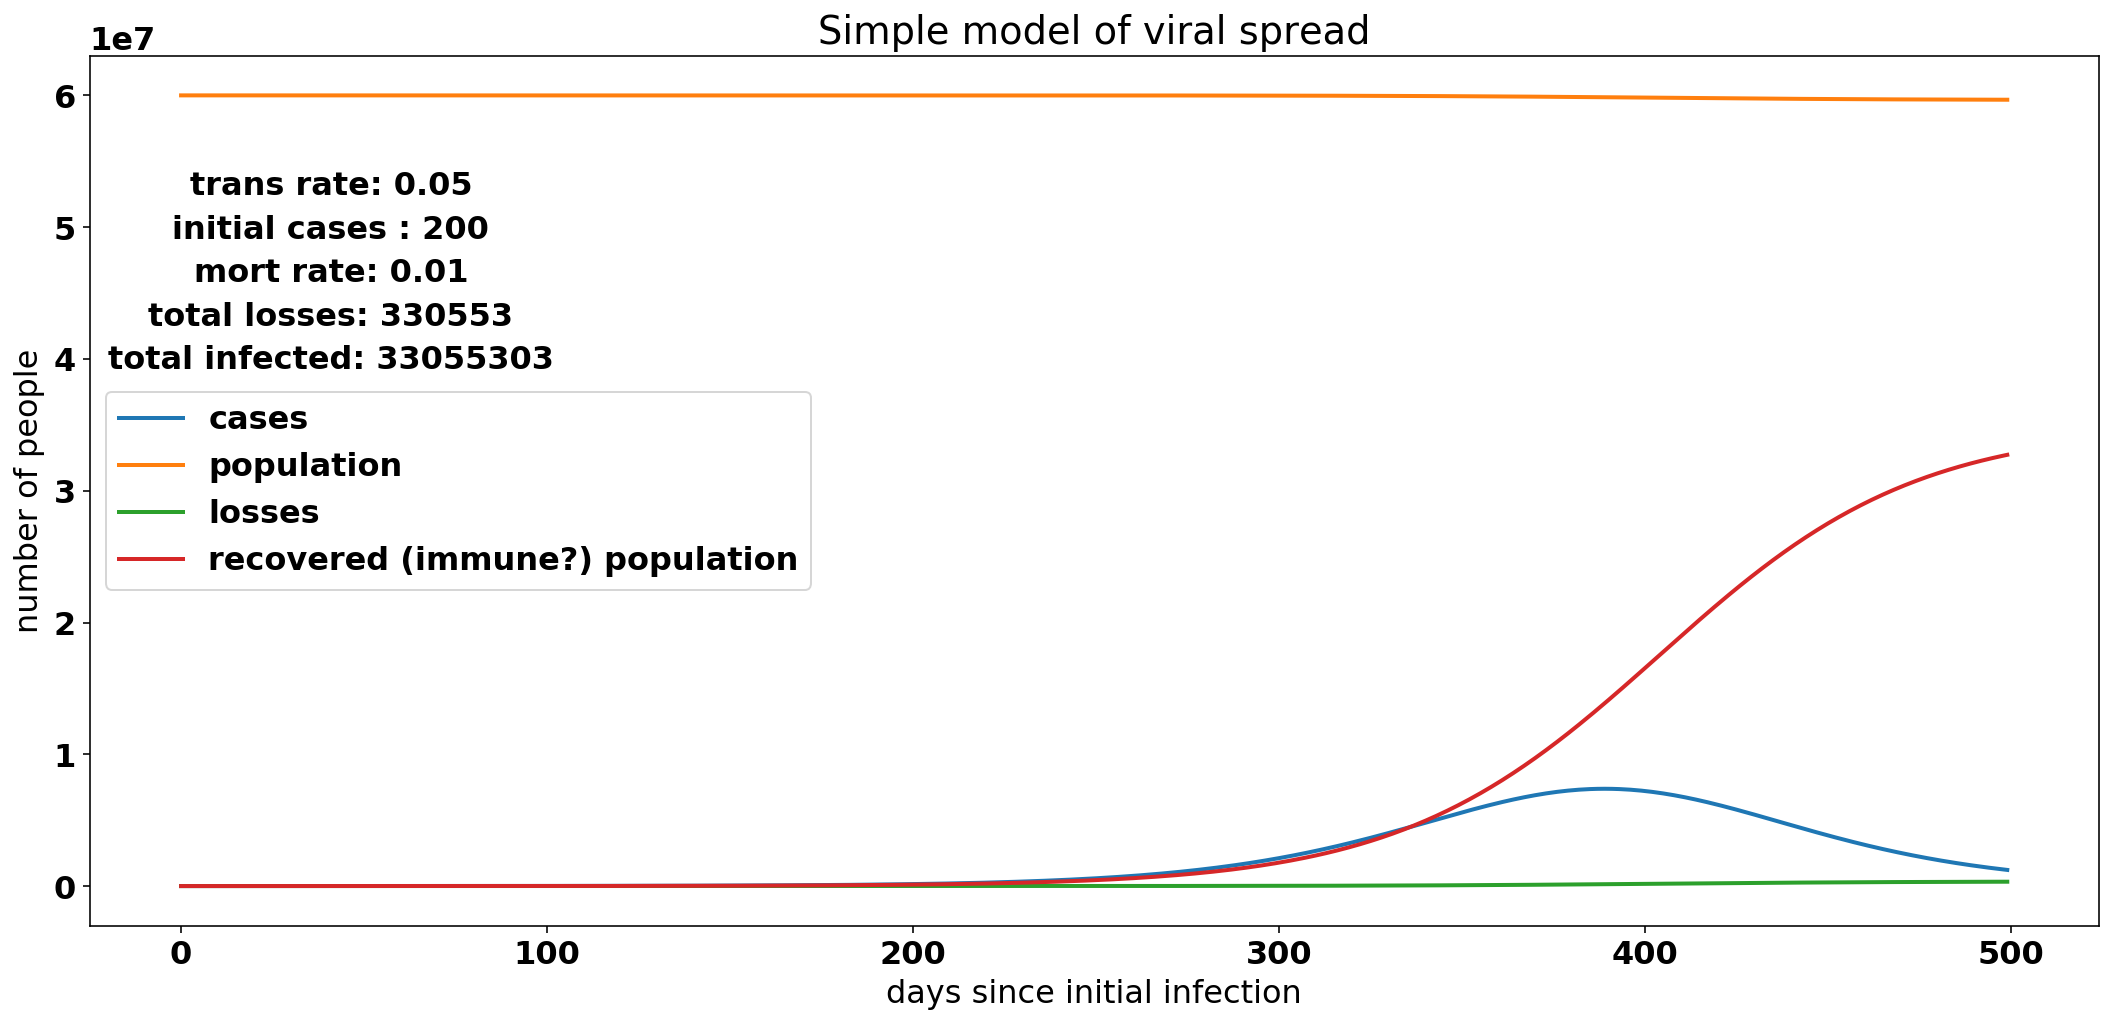

In [5]:
x=np.arange(500)
infe_start=200
start_pop=60000000
total_pop=60000000
trans_rate=0.05
mort_rate=0.01
infe_current=infe_start
pop_av=total_pop-infe_current
imm=0
cases=np.zeros(len(x))
tpop=np.zeros(len(x))
dd=np.zeros(len(x))
recovered=np.zeros(len(x))
new=np.zeros(len(x))
for i in x:
    if (i>=30):
        sick30days=new[i-30]
    else:
        sick30days=0
    infe_current, total_pop, pop_av, imm, new_cases=day_dev(infe_current, trans_rate,pop_av, total_pop, sick30days, imm, mort_rate)
    #print('infe: ', infe_current, 'total pop: ',total_pop, 'immunised : ',imm, 'susceptible_pop: ', pop_av, 'dead: ', start_pop-total_pop, 'new: ', new_cases)
    cases[i], tpop[i], dd[i], recovered[i], new[i]=infe_current, total_pop, start_pop-total_pop, imm, new_cases

plotter(cases, tpop, dd, recovered, trans_rate, mort_rate, infe_start)

<Figure size 432x288 with 0 Axes>

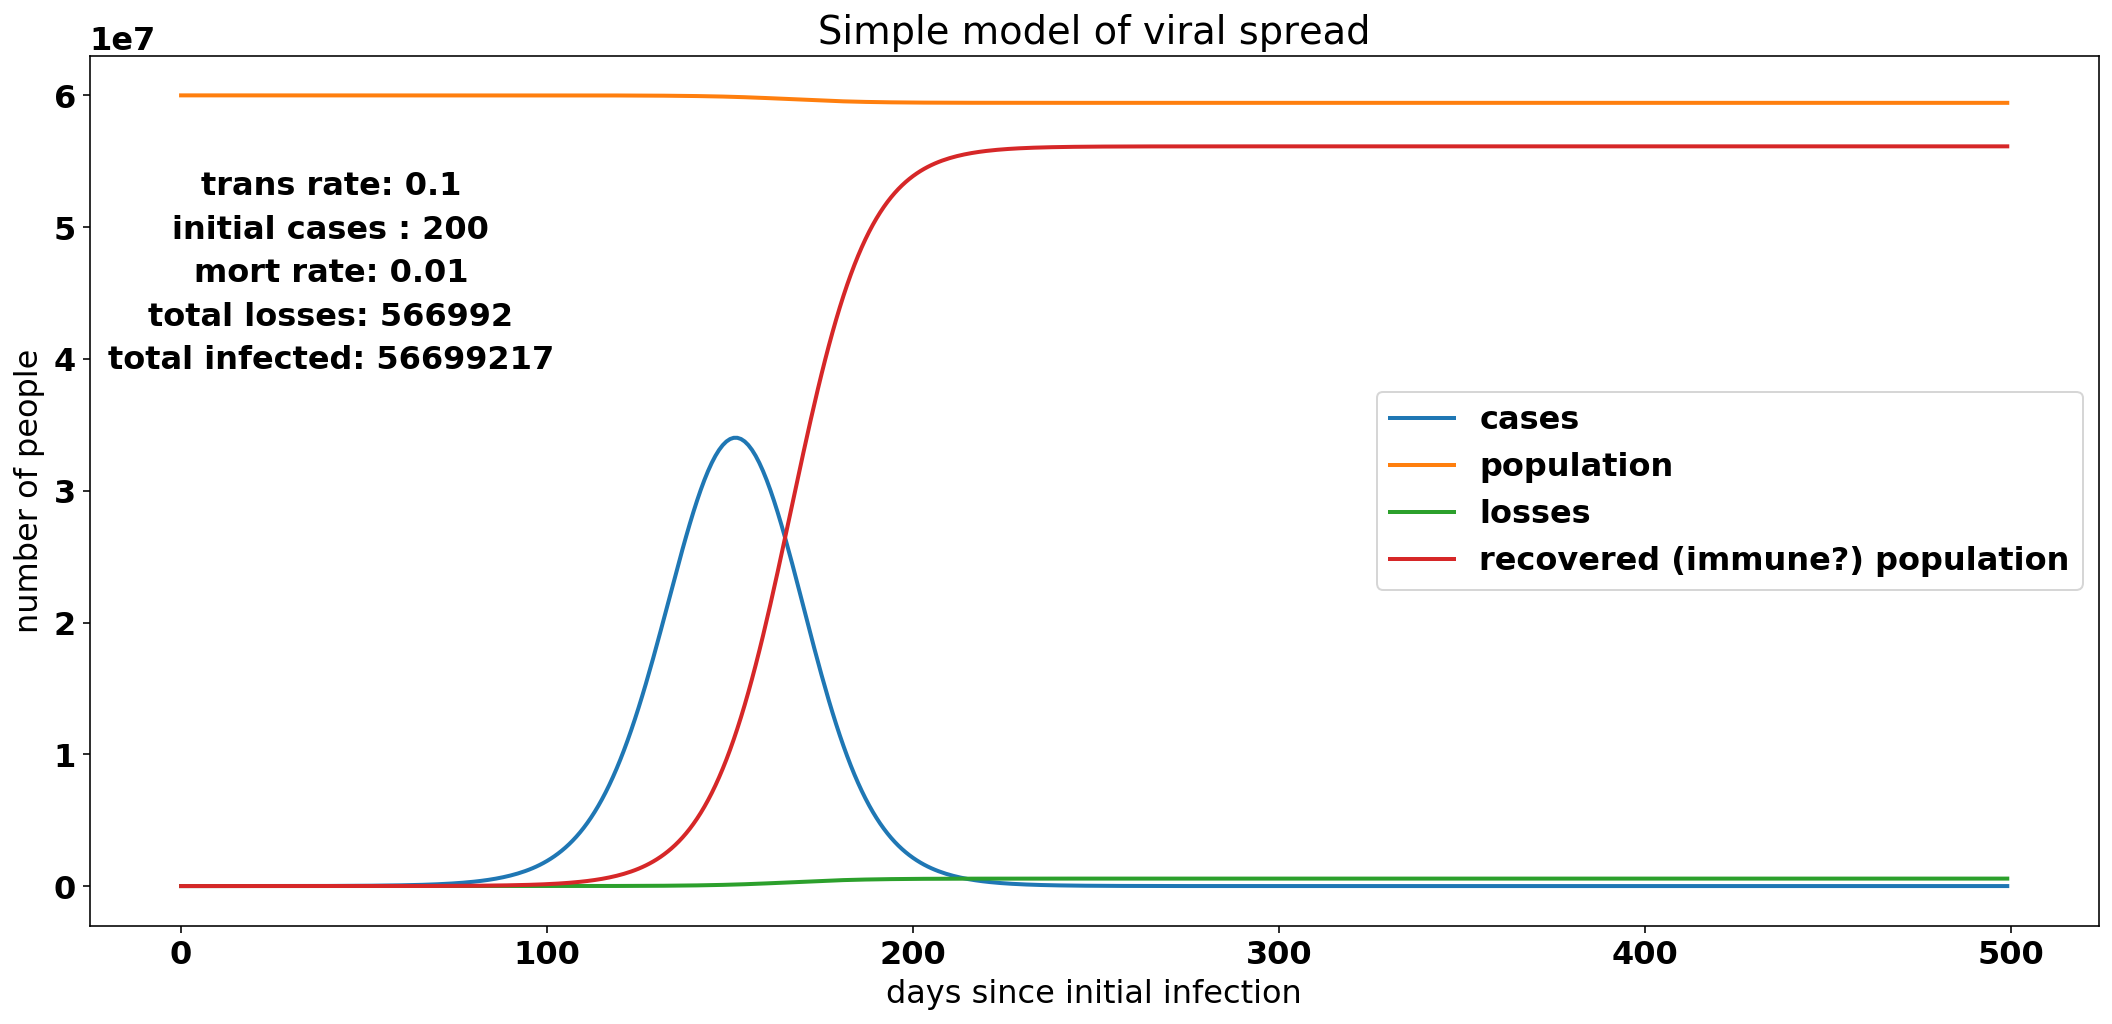

In [6]:
x=np.arange(500)
infe_start=200
start_pop=60000000
total_pop=60000000
trans_rate=0.1
mort_rate=0.01
infe_current=infe_start
pop_av=total_pop-infe_current
imm=0
cases=np.zeros(len(x))
tpop=np.zeros(len(x))
dd=np.zeros(len(x))
recovered=np.zeros(len(x))
new=np.zeros(len(x))
for i in x:
    if (i>=30):
        sick30days=new[i-30]
    else:
        sick30days=0
    infe_current, total_pop, pop_av, imm, new_cases=day_dev(infe_current, trans_rate,pop_av, total_pop, sick30days, imm, mort_rate)
    #print('infe: ', infe_current, 'total pop: ',total_pop, 'immunised : ',imm, 'susceptible_pop: ', pop_av, 'dead: ', start_pop-total_pop, 'new: ', new_cases)
    cases[i], tpop[i], dd[i], recovered[i], new[i]=infe_current, total_pop, start_pop-total_pop, imm, new_cases

plotter(cases, tpop, dd, recovered, trans_rate, mort_rate, infe_start)


<Figure size 432x288 with 0 Axes>

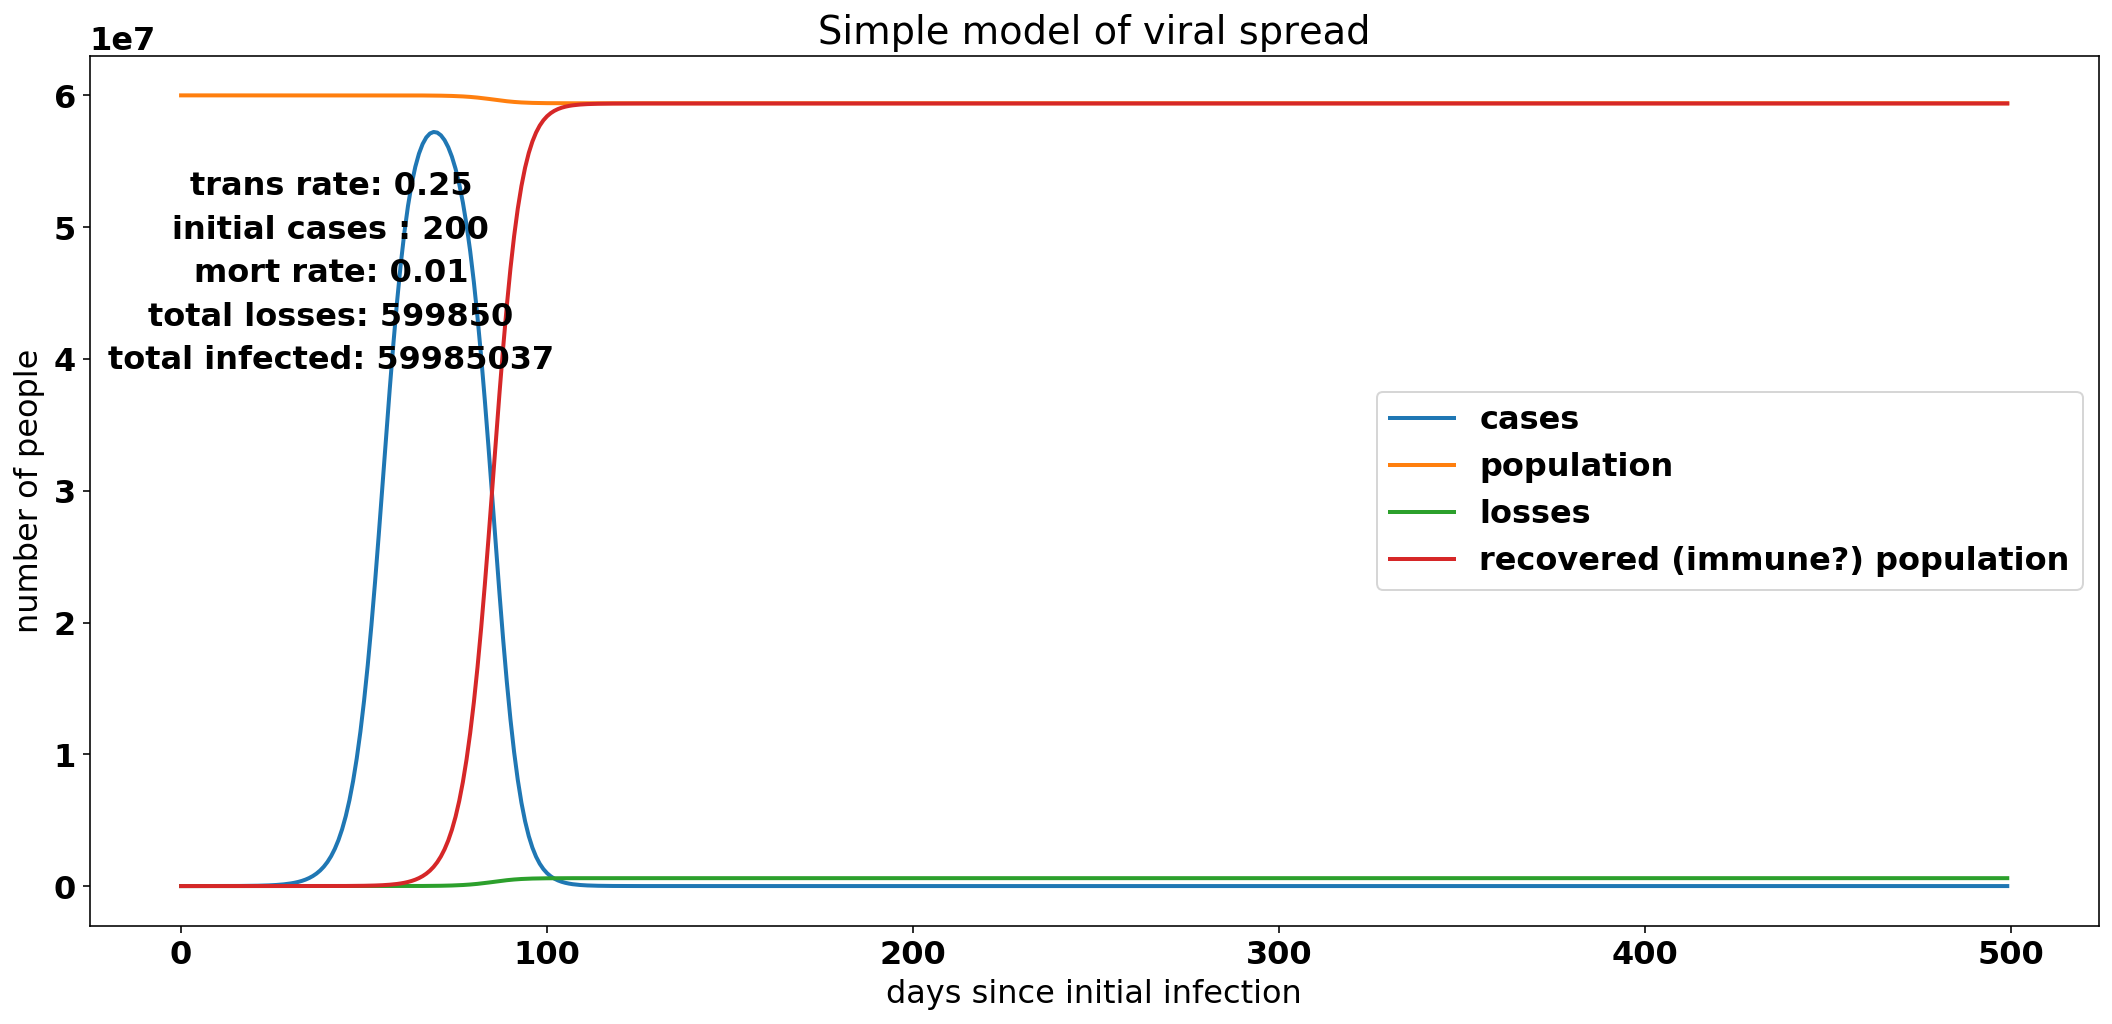

In [7]:

x=np.arange(500)
infe_start=200
start_pop=60000000
total_pop=60000000
trans_rate=0.25
mort_rate=0.01
infe_current=infe_start
pop_av=total_pop-infe_current
imm=0
cases=np.zeros(len(x))
tpop=np.zeros(len(x))
dd=np.zeros(len(x))
recovered=np.zeros(len(x))
new=np.zeros(len(x))
for i in x:
    if (i>=30):
        sick30days=new[i-30]
    else:
        sick30days=0
    infe_current, total_pop, pop_av, imm, new_cases=day_dev(infe_current, trans_rate,pop_av, total_pop, sick30days, imm, mort_rate)
    #print('infe: ', infe_current, 'total pop: ',total_pop, 'immunised : ',imm, 'susceptible_pop: ', pop_av, 'dead: ', start_pop-total_pop, 'new: ', new_cases)
    cases[i], tpop[i], dd[i], recovered[i], new[i]=infe_current, total_pop, start_pop-total_pop, imm, new_cases

plotter(cases, tpop, dd, recovered, trans_rate, mort_rate, infe_start)


Now what happens if we consider that there is a capacity for the health service above which it cannot cope and the mortality rate will increase as sick patients cannot be cared for.

We will set this capacity to 300,000 people sick (I have no idea how many respiritory cases the NHS could deal with but this seems like a lot).  We will consider that without care (so for all those above 300,000 cases) the mort rate is 3%. This updates equations 3 and 4.

In [8]:
def day_dev_capacity(infe,inf_rate, pop_avail, pop, infe_30pre, pop_imm, mort_rate1, mort_rate2, capacity):
    infe_new=inf_rate*infe*(pop_avail/pop) # eqn 1
    infe_total=infe+infe_new               # eqn 2
    healed=(np.min((infe_30pre,capacity))*(1-mort_rate1))+(np.max((0.,infe_30pre-capacity))*(1-mort_rate2)) # eqn 3
    mort=(np.min((infe_30pre,capacity))*mort_rate1)+(np.max((0,infe_30pre-capacity))*mort_rate2)   # eqn 4
    infe_total=infe_total-(healed+mort)   # eqn 5
    pop_imm=pop_imm+healed                 # eqn 6
    pop=pop-(mort)                         # eqn 7
    pop_avail=pop-(pop_imm+infe_total) # eqn 8
    return infe_total, pop, pop_avail, pop_imm, infe_new



<Figure size 432x288 with 0 Axes>

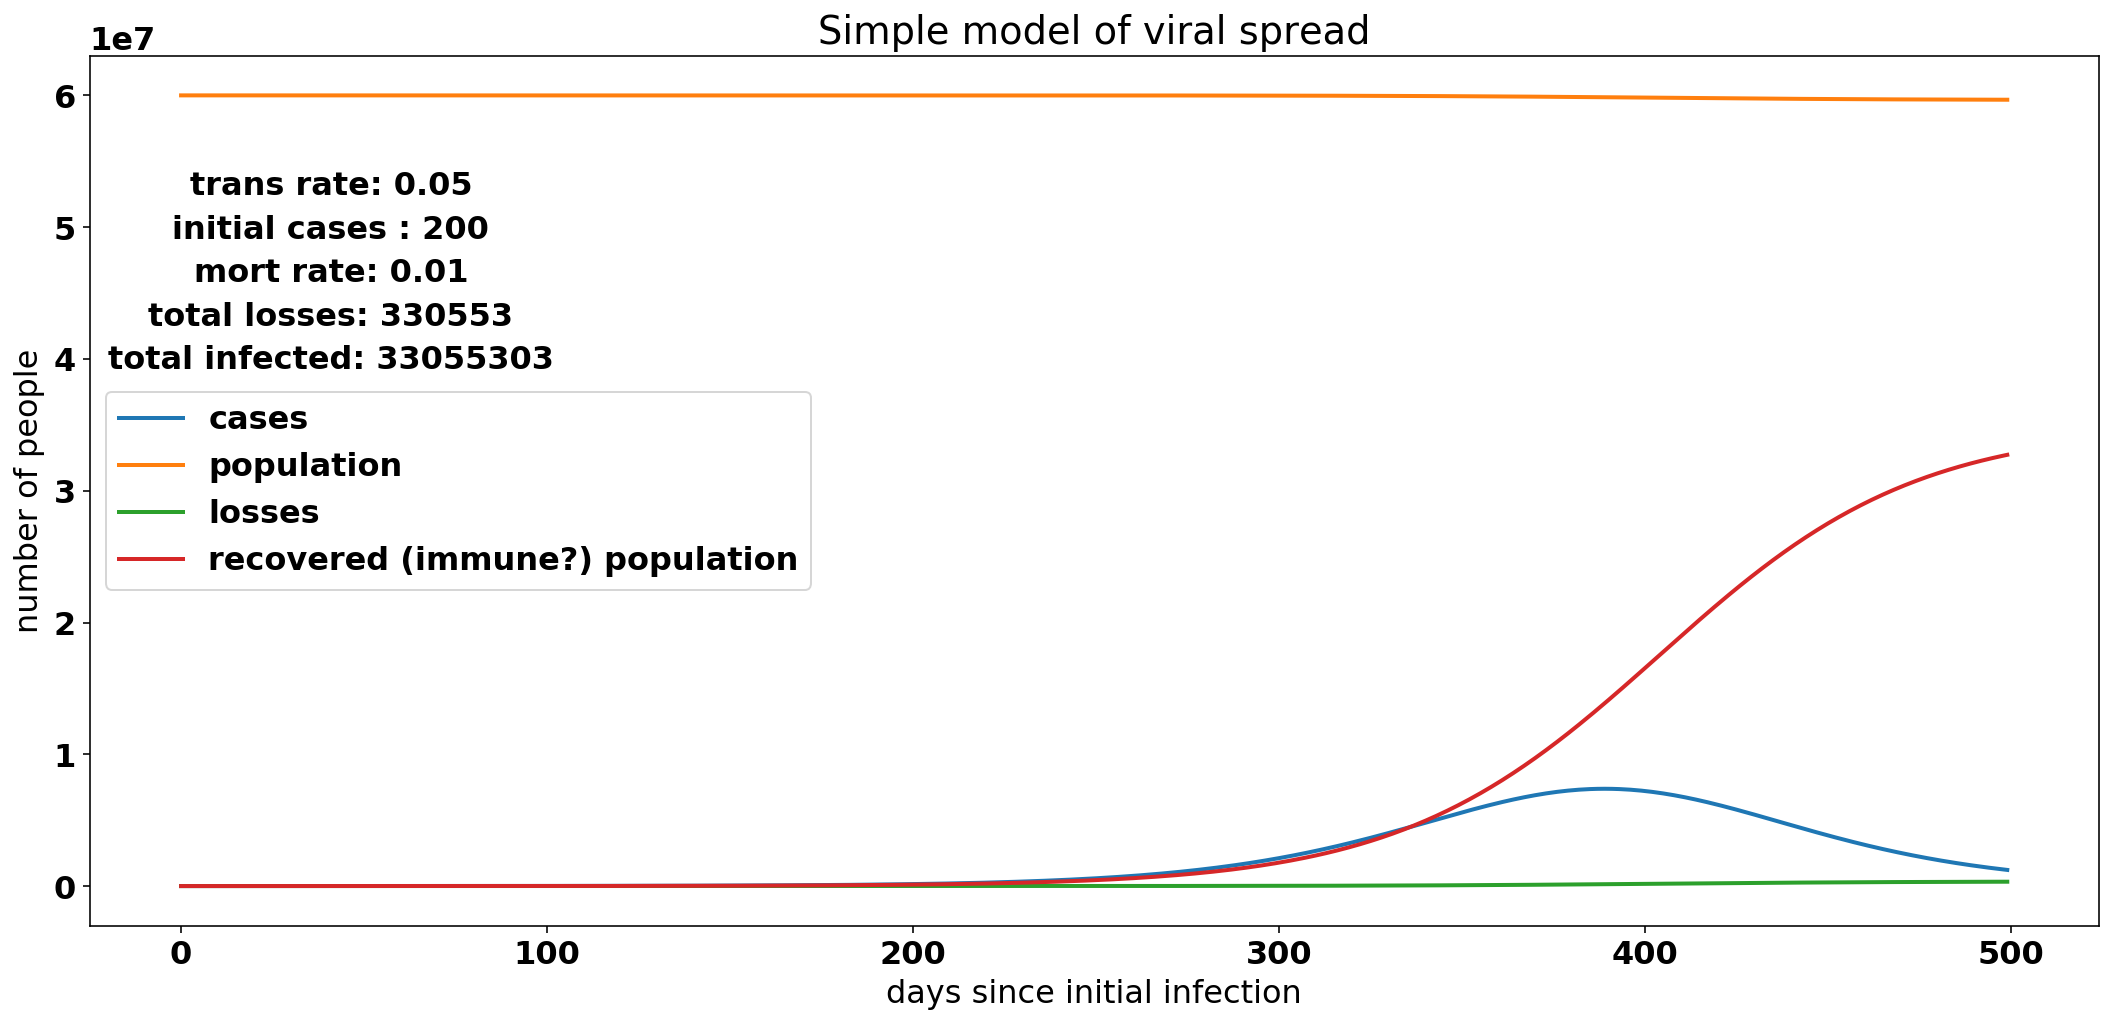

In [9]:

x=np.arange(500)
infe_start=200
start_pop=60000000
total_pop=60000000
trans_rate=0.05
mort_rate1=0.01
mort_rate2=0.03
capacity=300000
infe_current=infe_start
pop_av=total_pop-infe_current
imm=0
cases=np.zeros(len(x))
tpop=np.zeros(len(x))
dd=np.zeros(len(x))
recovered=np.zeros(len(x))
new=np.zeros(len(x))
for i in x:
    if (i>=30):
        sick30days=new[i-30]
    else:
        sick30days=0
    infe_current, total_pop, pop_av, imm, new_cases=day_dev_capacity(infe_current, trans_rate,pop_av, total_pop, sick30days, imm, mort_rate1, mort_rate2, capacity)
    #print('infe: ', infe_current, 'total pop: ',total_pop, 'immunised : ',imm, 'susceptible_pop: ', pop_av, 'dead: ', start_pop-total_pop, 'new: ', new_cases)
    cases[i], tpop[i], dd[i], recovered[i], new[i]=infe_current, total_pop, start_pop-total_pop, imm, new_cases

plotter(cases, tpop, dd, recovered, trans_rate, mort_rate, infe_start)


<Figure size 432x288 with 0 Axes>

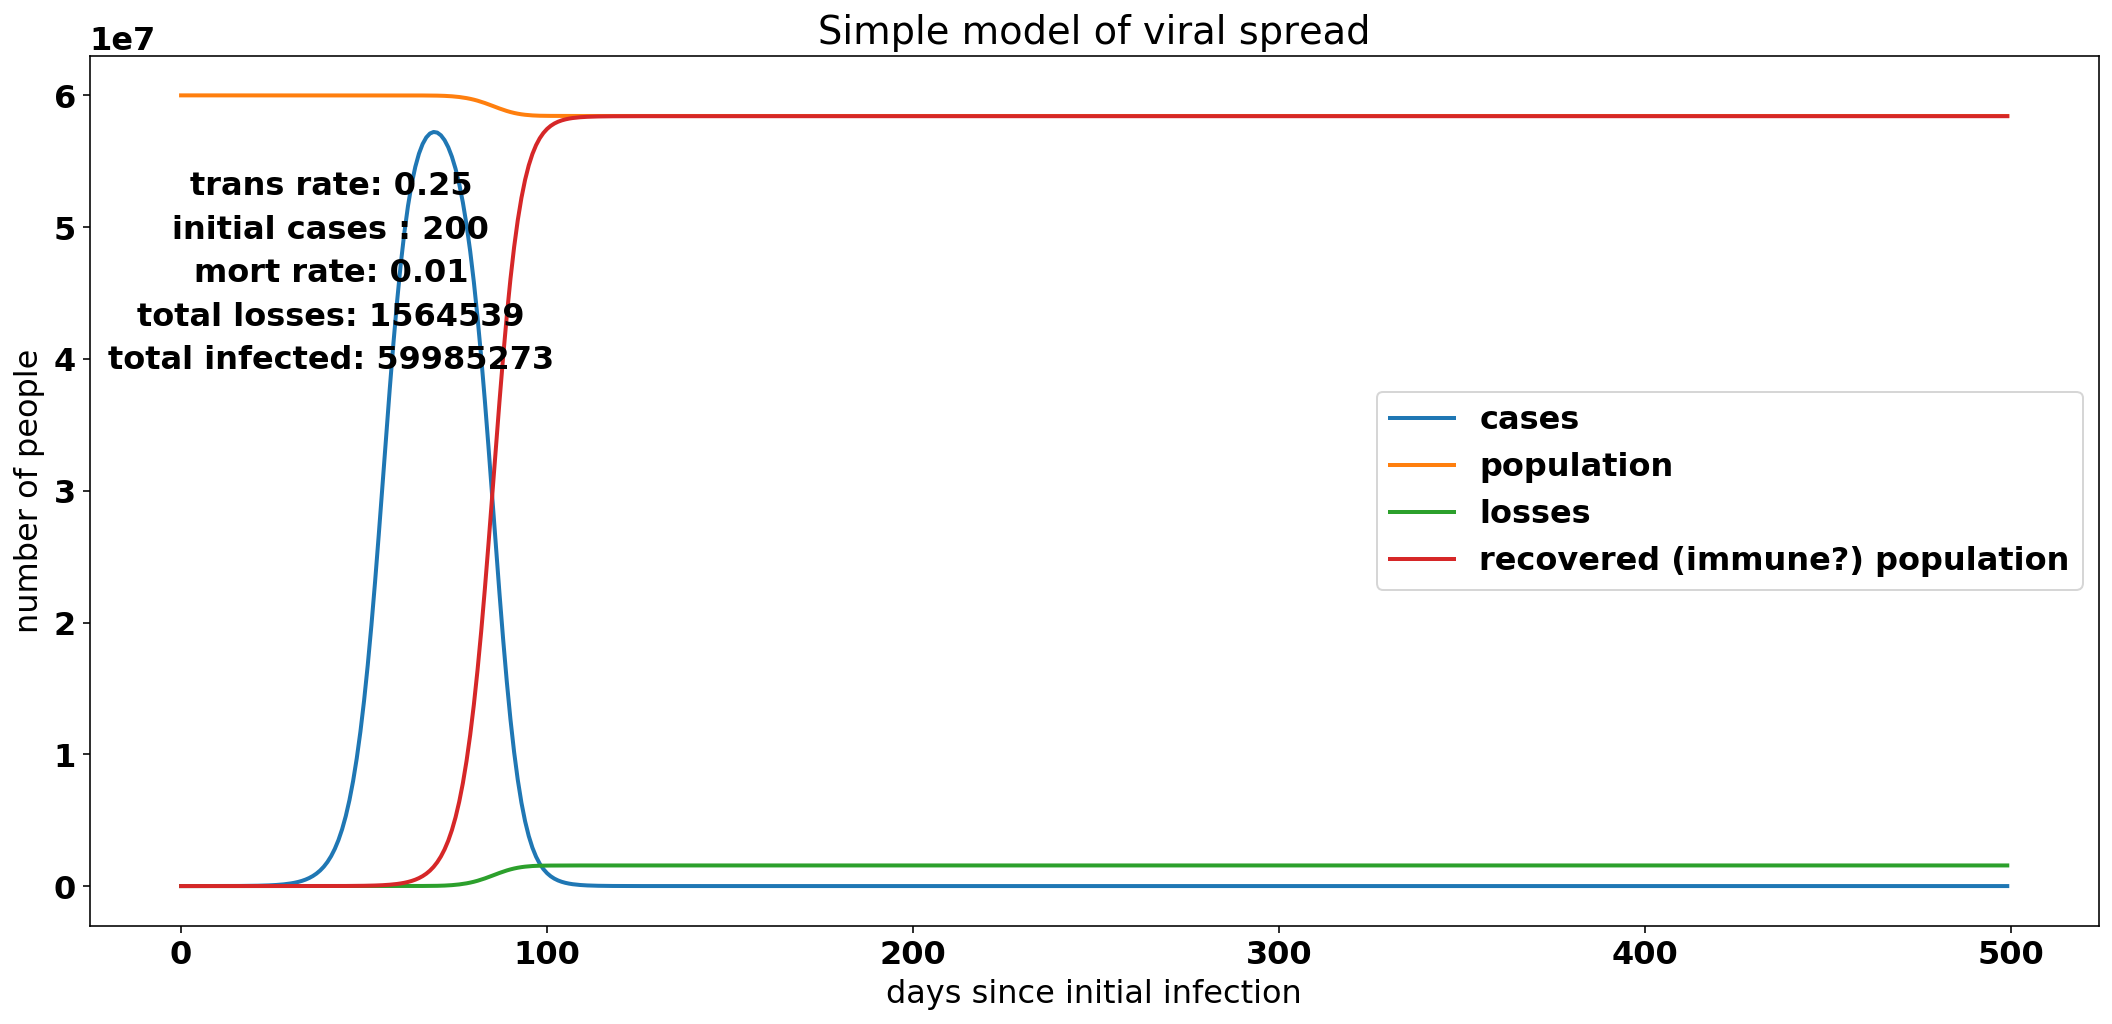

In [10]:

x=np.arange(500)
infe_start=200
start_pop=60000000
total_pop=60000000
trans_rate=0.25
mort_rate1=0.01
mort_rate2=0.03
capacity=300000
infe_current=infe_start
pop_av=total_pop-infe_current
imm=0
cases=np.zeros(len(x))
tpop=np.zeros(len(x))
dd=np.zeros(len(x))
recovered=np.zeros(len(x))
new=np.zeros(len(x))
for i in x:
    if (i>=30):
        sick30days=new[i-30]
    else:
        sick30days=0
    infe_current, total_pop, pop_av, imm, new_cases=day_dev_capacity(infe_current, trans_rate,pop_av, total_pop, sick30days, imm, mort_rate1, mort_rate2, capacity)
    #print('infe: ', infe_current, 'total pop: ',total_pop, 'immunised : ',imm, 'susceptible_pop: ', pop_av, 'dead: ', start_pop-total_pop, 'new: ', new_cases)
    cases[i], tpop[i], dd[i], recovered[i], new[i]=infe_current, total_pop, start_pop-total_pop, imm, new_cases

plotter(cases, tpop, dd, recovered, trans_rate, mort_rate, infe_start)


Comparing this higher transmission rate accounting for capacity to the 3rd plot (higher transmission rate without accounting for capacity of health service) we can see the number of losses at the end has almost tripled.  This is the impact of an overwhlemed helath service as the peak in cases is too sharp and not spread out as in the low transmission rate test.

So the results show that if you keep the transmission rate low enough you can lower the total number of cases and spread those cases over a longer period, allowing the health services to cope and keeping losses to a minimum.  Social distancing, quarantine, handwashing and other such precautions can all act to lower transmission rates.